In [23]:
# gensim 설치 (실습을 위해 반드시 gensim 3.6.0 버전 설치해 주세요)
# pip install gensim==3.6.0

In [1]:
from konlpy.tag import Komoran
tagger = Komoran()  # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs
import pandas as pd
from gensim.models import Word2Vec

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# articles = []
# articles = codecs.open("투캅스.txt", "r", encoding="utf-8")

# fp = codecs.open("투캅스.txt", "r", encoding="utf-8")
# soup = BeautifulSoup(fp, "html.parser")
# body = soup.select_one("body")
# text = body.getText()
# articles = fp.split("\n")
# len(articles)
# fp.close()

In [3]:
from konlpy.tag import Komoran

tagger = Komoran()  # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs

#투캅스 시나리오 읽어오기
#이 시나리오 데이터는 제공되어질수 없으며 배포가 불가능하오니 
#http://www.korean.go.kr(국립국어원)에서 회원가입을 하시고 다운을 받아주세요. 
articles = []
fp = codecs.open("투캅스.txt", "r", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
# body = soup.select_one("body")
# text = body.getText()
articles = soup
len(articles)
fp.close()

In [4]:
articles

[투캅스]


            S#1 프롤로그 (밤)


            1. (화면 가득히 보이는 도로 양 옆의 현란한 
          아크릴 간판들)

            2. (화려한 거리)

            3. (패트롤 카, 밤거리를 달려 나간다.)

            4. (자정 열두시가 되는 시계)

            5. (간판 불이 하나 둘 탁탁 꺼진다.)

            6. (꺼지는 간판들)

            7. (가라오께의 간판불이 꺼진다.)

            8.(웨이터 하나가 또다른 셔터에 자물쇠를 채우고 
          지하 계단을 내려간다. 웨이터가 사라지는 계단 
          아래쪽은 완전 적막!)

            9. (좌르르! 내려 닫히는 출입구의 육중한 셔터 
          도어)

            10. (채워지는 철문)

            11. (패트롤이 지나치면 차 안에서 망보던 부엉이가 
          몸을 일으킨다.)

            부엉이: 여긴 부엉이!
            12. 사장: 수고했다. 올빼미는 어떤가?
            13. 올빼미: 상황 끝.
            14. 사장: 좋아, 작전 개시!
            15. (배전판을 올리는 손)
            16. (불이 켜지는 샹드리에)
            17. 디제이: 네, 오랫동안 기다리셨습니다. 3번 
                     테이블 손님 권영락 씨 다함께 차차차!

            (마이크를 잡고 목이 터져라 뽕짝을 불러 제끼는 
          사내. 멀티비젼이 장치된 화려한 무대 위에서 춤추는 
          사람들)

            18. (복도를 따라 보이는 각 룸들의 흥겨운 분위기)

            19. (웨이터 하나가 계산서가 놓인 쟁반을 들고 
          문을 열고 들어온

In [5]:
import codecs
from konlpy.tag import Twitter

twitter = Twitter()

# 텍스트를 처리하기
twitter = Twitter()
results = []
lines = articles
words_all = []

for line in lines:
    # 형태소 분석하기
    malist = twitter.pos(line, norm=True, stem=True) # pos : part of speech, norm : 정규화
    print(malist)
    
    r = []
    for word in malist:
        # 명사/동사/형용사 만 걸러내기 
        if word[1] in ['Noun','Verb','Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    #print(rl)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('[', 'Punctuation'), ('투캅스', 'Noun'), (']', 'Punctuation'), ('\r\n\r\n\r\n            ', 'Foreign'), ('S', 'Alpha'), ('#', 'Punctuation'), ('1', 'Number'), ('프롤로그', 'Noun'), ('(', 'Punctuation'), ('밤', 'Noun'), (')', 'Punctuation'), ('\r\n\r\n\r\n            ', 'Foreign'), ('1', 'Number'), ('.', 'Punctuation'), ('(', 'Punctuation'), ('화면', 'Noun'), ('가득하다', 'Adjective'), ('보이다', 'Verb'), ('도로', 'Noun'), ('양', 'Noun'), ('옆', 'Noun'), ('의', 'Josa'), ('현란하다', 'Adjective'), ('아크릴', 'Noun'), ('간판', 'Noun'), ('들', 'Suffix'), (')', 'Punctuation'), ('\r\n\r\n            ', 'Foreign'), ('2', 'Number'), ('.', 'Punctuation'), ('(', 'Punctuation'), ('화려하다', 'Adjective'), ('거리', 'Noun'), (')', 'Punctuation'), ('\r\n\r\n            ', 'Foreign'), ('3', 'Number'), ('.', 'Punctuation'), ('(', 'Punctuation'), ('패', 'Noun'), ('트롤', 'Noun'), ('카', 'Noun'), (',', 'Punctuation'), ('밤', 'Noun'), ('거리', 'Noun'), ('를', 'Josa'), ('달다', 'Verb'), ('나가다', 'Verb'), ('.)', 'Punctuation'), ('\r\n\r\n            ',

In [6]:
words_all 

['투캅스',
 '프롤로그',
 '밤',
 '화면',
 '가득하다',
 '보이다',
 '도로',
 '양',
 '옆',
 '현란하다',
 '아크릴',
 '간판',
 '화려하다',
 '거리',
 '패',
 '트롤',
 '카',
 '밤',
 '거리',
 '달다',
 '나가다',
 '자정',
 '열두시',
 '되다',
 '시계',
 '간판',
 '불',
 '하나',
 '둘',
 '탁탁',
 '꺼지다',
 '꺼지다',
 '간판',
 '가르다',
 '간판',
 '불',
 '꺼지다',
 '웨이터',
 '하나',
 '셔터',
 '자물쇠',
 '채우다',
 '지하',
 '계단',
 '내려가다',
 '웨이터',
 '사라지다',
 '계단',
 '아래쪽',
 '완전',
 '적막',
 '좌르르',
 '내다',
 '닫히다',
 '출입구',
 '육중',
 '셔터',
 '도어',
 '채우다',
 '철문',
 '패',
 '트롤',
 '지나치다',
 '차',
 '안',
 '망',
 '보다',
 '부엉이',
 '몸',
 '일으키다',
 '부엉이',
 '여기다',
 '부엉이',
 '사장',
 '수고',
 '하다',
 '올빼미',
 '어떻다',
 '올빼미',
 '상황',
 '끝',
 '사장',
 '좋다',
 '작전',
 '개시',
 '배',
 '전판',
 '올리다',
 '손',
 '불',
 '켜지다',
 '샹드리',
 '디제이',
 '네',
 '기다리다',
 '번',
 '테이블',
 '손님',
 '권',
 '영락',
 '씨',
 '차차차',
 '마이크',
 '잡고',
 '목',
 '터지다',
 '뽕짝',
 '불다',
 '끼',
 '사내',
 '멀티비젼',
 '장치',
 '되다',
 '화려하다',
 '무대',
 '위',
 '춤추다',
 '사람',
 '복도',
 '따르다',
 '보이다',
 '각',
 '룸들',
 '흥겹다',
 '분위기',
 '웨이터',
 '하나',
 '계산서',
 '놓이다',
 '쟁반',
 '들다',
 '문',
 '열다',
 '들어오다',
 '계산서',
 '집다',
 '보다',
 '

In [7]:
type(words_all)

list

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

#명사만 추출
def get_noun(words_all):
    nouns = tagger.nouns(words_all)
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출

In [9]:
#TF-IDF 행렬구하기
cv = TfidfVectorizer(tokenizer=get_noun, max_features=100) # feature 개수 100개로 임의 설정
cv

TfidfVectorizer(max_features=100,
                tokenizer=<function get_noun at 0x00000245F3698EE0>)

In [10]:
tdm = cv.fit_transform(words_all) # tdm : term-document matrix

In [11]:
print(tdm)

  (0, 92)	1.0
  (11, 3)	1.0
  (13, 5)	1.0
  (18, 5)	1.0
  (25, 3)	1.0
  (32, 3)	1.0
  (34, 3)	1.0
  (37, 70)	1.0
  (43, 8)	1.0
  (45, 70)	1.0
  (47, 8)	1.0
  (67, 36)	1.0
  (70, 36)	1.0
  (72, 36)	1.0
  (73, 41)	1.0
  (81, 41)	1.0
  (97, 48)	1.0
  (109, 38)	1.0
  (117, 39)	1.0
  (118, 35)	1.0
  (125, 70)	1.0
  (137, 25)	1.0
  (139, 97)	1.0
  (141, 97)	1.0
  (149, 62)	1.0
  :	:
  (11756, 97)	1.0
  (11759, 49)	1.0
  (11762, 97)	1.0
  (11771, 97)	1.0
  (11778, 97)	1.0
  (11782, 97)	1.0
  (11786, 97)	1.0
  (11790, 97)	1.0
  (11796, 97)	1.0
  (11800, 97)	1.0
  (11802, 97)	1.0
  (11806, 97)	1.0
  (11818, 83)	1.0
  (11820, 97)	1.0
  (11826, 97)	1.0
  (11830, 97)	1.0
  (11835, 97)	1.0
  (11841, 97)	1.0
  (11845, 97)	1.0
  (11850, 23)	1.0
  (11856, 28)	1.0
  (11865, 97)	1.0
  (11871, 97)	1.0
  (11876, 30)	1.0
  (11879, 95)	1.0


In [12]:
print(tdm.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
import numpy
import operator

In [14]:
words = cv.get_feature_names()  # word 추출 (100개)
words

['가방',
 '가지',
 '간다',
 '간판',
 '감찰',
 '거리',
 '경찰',
 '경찰서',
 '계단',
 '고개',
 '공중전화',
 '과장',
 '그랜저',
 '근무',
 '기도',
 '꼴통',
 '나야',
 '남자',
 '내일',
 '농담',
 '당장',
 '대가리',
 '도둑',
 '동안',
 '두다',
 '뒷모습',
 '라다',
 '마약',
 '머리',
 '멸치',
 '모습',
 '목사',
 '민호',
 '반장',
 '변태',
 '복도',
 '부엉이',
 '사건',
 '사내',
 '사람',
 '사실',
 '사장',
 '새끼',
 '생각',
 '서장',
 '선배',
 '소리',
 '소매치기',
 '손님',
 '수갑',
 '수석',
 '수원',
 '시간',
 '시야',
 '시작',
 '식사',
 '쏜다',
 '아웃',
 '아파트',
 '얘기',
 '어이',
 '얼굴',
 '얼마',
 '여경',
 '여자',
 '오늘',
 '오락실',
 '오렌지',
 '요즘',
 '운전',
 '웨이터',
 '유리창',
 '은지',
 '이다',
 '이번',
 '인사',
 '입구',
 '자리',
 '자식',
 '자신',
 '저택',
 '전경',
 '전화',
 '조서',
 '졸개',
 '종업원',
 '주위',
 '주인',
 '총알',
 '취조',
 '친구',
 '카페',
 '투캅스',
 '트렁크',
 '표정',
 '프레임',
 '필터',
 '형사',
 '혼자',
 '황조']

In [15]:
count_mat = tdm.sum(axis=0) #  단어별로 count 매김
count_mat

matrix([[  12.,   13.,   11.,    6.,    7.,   22.,   53.,   10.,    7.,
           15.,    7.,   35.,   34.,   13.,   10.,   18.,    8.,   16.,
            7.,    8.,    6.,    6.,    7.,    9.,   11.,    8.,   10.,
           12.,    6.,   15.,   15.,   12.,    8.,   25.,   19.,    7.,
            9.,    6.,   26.,   35.,    6.,   61.,   16.,   21.,   37.,
           19.,   58.,   27.,   14.,    6.,    7.,  147.,    9.,    8.,
            7.,    8.,   11.,   10.,   16.,    8.,    8.,   35.,    6.,
           32.,   31.,   12.,    8.,   16.,    8.,    8.,   14.,    6.,
            8.,   22.,    8.,    6.,    7.,    9.,   23.,   12.,    6.,
           14.,   19.,    6.,   18.,    9.,   10.,   30.,   12.,    6.,
            7.,    6.,   33.,   10.,   18.,    6.,   31., 1079.,    6.,
           49.]])

In [16]:
count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
count

array([  12.,   13.,   11.,    6.,    7.,   22.,   53.,   10.,    7.,
         15.,    7.,   35.,   34.,   13.,   10.,   18.,    8.,   16.,
          7.,    8.,    6.,    6.,    7.,    9.,   11.,    8.,   10.,
         12.,    6.,   15.,   15.,   12.,    8.,   25.,   19.,    7.,
          9.,    6.,   26.,   35.,    6.,   61.,   16.,   21.,   37.,
         19.,   58.,   27.,   14.,    6.,    7.,  147.,    9.,    8.,
          7.,    8.,   11.,   10.,   16.,    8.,    8.,   35.,    6.,
         32.,   31.,   12.,    8.,   16.,    8.,    8.,   14.,    6.,
          8.,   22.,    8.,    6.,    7.,    9.,   23.,   12.,    6.,
         14.,   19.,    6.,   18.,    9.,   10.,   30.,   12.,    6.,
          7.,    6.,   33.,   10.,   18.,    6.,   31., 1079.,    6.,
         49.])

In [17]:
word_count = list(zip(words, count))
word_count

[('가방', 12.0),
 ('가지', 13.0),
 ('간다', 11.0),
 ('간판', 6.0),
 ('감찰', 7.0),
 ('거리', 22.0),
 ('경찰', 53.0),
 ('경찰서', 10.0),
 ('계단', 7.0),
 ('고개', 15.0),
 ('공중전화', 7.0),
 ('과장', 35.0),
 ('그랜저', 34.0),
 ('근무', 13.0),
 ('기도', 10.0),
 ('꼴통', 18.0),
 ('나야', 8.0),
 ('남자', 16.0),
 ('내일', 7.0),
 ('농담', 8.0),
 ('당장', 6.0),
 ('대가리', 6.0),
 ('도둑', 7.0),
 ('동안', 9.0),
 ('두다', 11.0),
 ('뒷모습', 8.0),
 ('라다', 10.0),
 ('마약', 12.0),
 ('머리', 6.0),
 ('멸치', 15.0),
 ('모습', 15.0),
 ('목사', 12.0),
 ('민호', 8.0),
 ('반장', 25.0),
 ('변태', 19.0),
 ('복도', 7.0),
 ('부엉이', 9.0),
 ('사건', 6.0),
 ('사내', 26.0),
 ('사람', 35.0),
 ('사실', 6.0),
 ('사장', 61.0),
 ('새끼', 16.0),
 ('생각', 21.0),
 ('서장', 37.0),
 ('선배', 19.0),
 ('소리', 58.0),
 ('소매치기', 27.0),
 ('손님', 14.0),
 ('수갑', 6.0),
 ('수석', 7.0),
 ('수원', 147.0),
 ('시간', 9.0),
 ('시야', 8.0),
 ('시작', 7.0),
 ('식사', 8.0),
 ('쏜다', 11.0),
 ('아웃', 10.0),
 ('아파트', 16.0),
 ('얘기', 8.0),
 ('어이', 8.0),
 ('얼굴', 35.0),
 ('얼마', 6.0),
 ('여경', 32.0),
 ('여자', 31.0),
 ('오늘', 12.0),
 ('오락실', 8.0),
 ('오렌지', 16

In [18]:
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # 상위  count 순으로 정렬 
word_count

[('형사', 1079.0),
 ('수원', 147.0),
 ('사장', 61.0),
 ('소리', 58.0),
 ('경찰', 53.0),
 ('황조', 49.0),
 ('서장', 37.0),
 ('과장', 35.0),
 ('사람', 35.0),
 ('얼굴', 35.0),
 ('그랜저', 34.0),
 ('투캅스', 33.0),
 ('여경', 32.0),
 ('여자', 31.0),
 ('필터', 31.0),
 ('주인', 30.0),
 ('소매치기', 27.0),
 ('사내', 26.0),
 ('반장', 25.0),
 ('자식', 23.0),
 ('거리', 22.0),
 ('이다', 22.0),
 ('생각', 21.0),
 ('변태', 19.0),
 ('선배', 19.0),
 ('전화', 19.0),
 ('꼴통', 18.0),
 ('졸개', 18.0),
 ('표정', 18.0),
 ('남자', 16.0),
 ('새끼', 16.0),
 ('아파트', 16.0),
 ('오렌지', 16.0),
 ('고개', 15.0),
 ('멸치', 15.0),
 ('모습', 15.0),
 ('손님', 14.0),
 ('웨이터', 14.0),
 ('전경', 14.0),
 ('가지', 13.0),
 ('근무', 13.0),
 ('가방', 12.0),
 ('마약', 12.0),
 ('목사', 12.0),
 ('오늘', 12.0),
 ('자신', 12.0),
 ('총알', 12.0),
 ('간다', 11.0),
 ('두다', 11.0),
 ('쏜다', 11.0),
 ('경찰서', 10.0),
 ('기도', 10.0),
 ('라다', 10.0),
 ('아웃', 10.0),
 ('주위', 10.0),
 ('트렁크', 10.0),
 ('동안', 9.0),
 ('부엉이', 9.0),
 ('시간', 9.0),
 ('자리', 9.0),
 ('종업원', 9.0),
 ('나야', 8.0),
 ('농담', 8.0),
 ('뒷모습', 8.0),
 ('민호', 8.0),
 ('시야', 8.0),
 ('식사

In [19]:
hot_key = list(dict(word_count[:50]).keys())
hot_key

['형사',
 '수원',
 '사장',
 '소리',
 '경찰',
 '황조',
 '서장',
 '과장',
 '사람',
 '얼굴',
 '그랜저',
 '투캅스',
 '여경',
 '여자',
 '필터',
 '주인',
 '소매치기',
 '사내',
 '반장',
 '자식',
 '거리',
 '이다',
 '생각',
 '변태',
 '선배',
 '전화',
 '꼴통',
 '졸개',
 '표정',
 '남자',
 '새끼',
 '아파트',
 '오렌지',
 '고개',
 '멸치',
 '모습',
 '손님',
 '웨이터',
 '전경',
 '가지',
 '근무',
 '가방',
 '마약',
 '목사',
 '오늘',
 '자신',
 '총알',
 '간다',
 '두다',
 '쏜다']

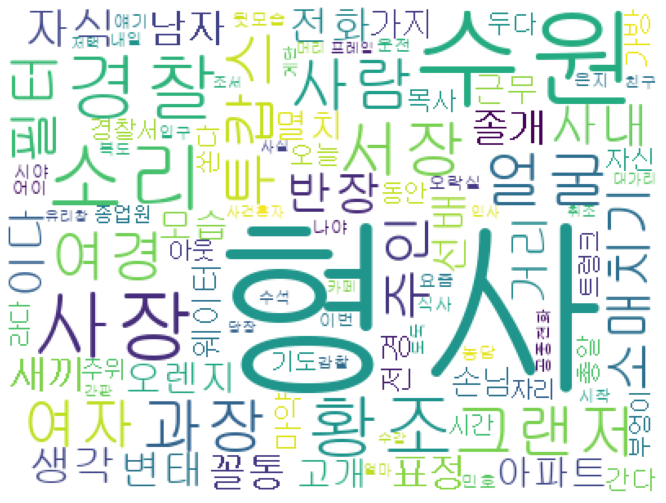

In [20]:
# word cloud
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud

wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [21]:
# 형태소 분석기 라이브러리 로딩
import codecs
from konlpy.tag import Twitter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [22]:
# 파일로 저장하기
from gensim.models import word2vec
drwill_file = 'twocops_w2v.model'
with open(drwill_file, 'w', encoding='utf-8') as fp2:
    fp2.write("\n".join(results))
    
fp2.close() 

In [25]:
# Word2Vec 모델
data = word2vec.LineSentence(drwill_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
# size : 벡터의 크기 정해줌(2차원 벡터: 200, 3차원 벡터:300) 
# 크기가 클수록 자세한 word 정보 담을 수 있음. 단, 속도 느림
# window : 관련있는 word의 범위(주변단어 10개까지 포함) 
# sg : skip-gram (성능이 좋음) sg=0(default) : CBOW
model.save("twocops_w2v.model")

In [26]:
results

['투캅스 프롤로그 밤 화면 가득하다 보이다 도로 양 옆 현란하다 아크릴 간판 화려하다 거리 패 트롤 카 밤 거리 달다 나가다 자정 열두시 되다 시계 간판 불 하나 둘 탁탁 꺼지다 꺼지다 간판 가르다 간판 불 꺼지다 웨이터 하나 셔터 자물쇠 채우다 지하 계단 내려가다 웨이터 사라지다 계단 아래쪽 완전 적막 좌르르 내다 닫히다 출입구 육중 셔터 도어 채우다 철문 패 트롤 지나치다 차 안 망 보다 부엉이 몸 일으키다 부엉이 여기다 부엉이 사장 수고 하다 올빼미 어떻다 올빼미 상황 끝 사장 좋다 작전 개시 배 전판 올리다 손 불 켜지다 샹드리 디제이 네 기다리다 번 테이블 손님 권 영락 씨 차차차 마이크 잡고 목 터지다 뽕짝 불다 끼 사내 멀티비젼 장치 되다 화려하다 무대 위 춤추다 사람 복도 따르다 보이다 각 룸들 흥겹다 분위기 웨이터 하나 계산서 놓이다 쟁반 들다 문 열다 들어오다 계산서 집다 보다 뒷모습 조 형사 조 형사 이 보다 김 전무 자네 달 봉급 얼마 김 형사 원 조 형사 젠장 하다 달 봉급 두 시간 날리다 카드 되다 웨이터 예 이다 조 형사 지갑 꺼내다 보이 저 비자 카 데 웨이터 되다 조 형사 있다 카드 어디 가다 기 막히다 표정 웨이터 권총 수갑 등 꺼내다 형사 김 형사 내 카드 그을 것 구속영장 것 압수 수색 영장 웨이터 휘둥그레지다 아니다 잠깐 기다리다 줄다 웨이터 뛰다 나가다 돈 세다 사장 휘둥그레지다 사장 뭐 경찰 웨이터 예 틀림없다 요 사장 이렇다 나쁘다 새끼 웨이터 나쁘다 우리 마찬가지 사장 뭐 임마 경리 봉투 하나 만들다 경리 얼마나 넣다 사장 당 평균 있다 평균 두 새끼 거기 곱하기 이하 되다 거 알다 경리 예 비밀 문 열리다 그 속 조 형사 김 형사 사장 배웅 받다 나오다 웨이터 안녕하다 가다 안녕하다 가다 사장 듯이 인사 하다 살피다 가시다 길이 꽤 험하다 겁니다 김 형사 손님 밉다 터지다 거 우리 다녀가다 데 재수 좋다 조 형사 그렇다 사장 안녕하다 가다 둘 꽁무니 대고 대가리 깊숙하다 치다 박다 복도 보일러 실로 통 하다 문 

In [27]:
model

In [ ]:
################ 테스트 ##########################################

In [28]:
#경찰과 가장 가까운 단어는?
model.wv.most_similar(positive=["경찰"])

[('이렇다', 0.9822848439216614),
 ('이르다', 0.9818698167800903),
 ('이다', 0.9810321927070618),
 ('왜', 0.9799836874008179),
 ('게', 0.9795948266983032),
 ('넌', 0.9784525632858276),
 ('좋다', 0.9764848351478577),
 ('어이', 0.9751449823379517),
 ('죽', 0.9745703935623169),
 ('좀', 0.9745067358016968)]

In [29]:
#여자와 가장 가까운 단어는?
model.wv.most_similar(positive=["여자"])  

[('전화', 0.9477294683456421),
 ('하루', 0.9394060373306274),
 ('공중전화', 0.9371733665466309),
 ('전화하다', 0.9361816644668579),
 ('저녁', 0.931076169013977),
 ('뜻', 0.9286893010139465),
 ('나야', 0.928274393081665),
 ('이제', 0.9280955195426941),
 ('다시', 0.9279847145080566),
 ('무용지물', 0.9267722964286804)]

In [30]:
# 형사의 데이터 벡터
model.wv['형사']  

array([-1.23646948e-03, -3.02419644e-02, -6.74185902e-03, -4.33508046e-02,
        4.29024501e-03, -2.05330908e-01, -7.03122374e-03,  6.91260621e-02,
        2.42400803e-02,  2.39929613e-02, -4.13828576e-03,  5.48167005e-02,
        1.52194694e-01, -1.05254240e-02,  7.33706951e-02, -8.71343613e-02,
        2.16804668e-02,  1.52229741e-01,  1.18827254e-01,  3.46174501e-02,
        1.21927924e-01, -1.00292169e-01, -1.32278904e-01, -6.32035732e-02,
        9.53231603e-02, -8.10469016e-02,  8.04531425e-02,  6.02376796e-02,
        1.43850660e-02,  1.33559808e-01, -6.24490976e-02, -1.02097951e-01,
       -5.54682571e-04, -5.95476553e-02, -1.96808517e-01, -3.18824612e-02,
        1.21024542e-01,  2.88807571e-01, -2.80208793e-02, -5.08732349e-02,
        1.76566225e-02, -1.32689387e-01, -4.38923799e-02,  1.98667094e-01,
        1.02563813e-01,  6.11177199e-02,  4.42522727e-02,  3.50954533e-02,
       -8.12180713e-02, -5.84789552e-02, -8.44185725e-02, -3.79826017e-02,
       -2.28056684e-01, -

In [31]:
model.wv.most_similar(positive=["경찰","물건"] , negative=["여자"])    # 경찰 + 물건 - 여자

[('수석', 0.9506601691246033),
 ('증인', 0.9448086023330688),
 ('다니다', 0.9420908689498901),
 ('울다', 0.9419001340866089),
 ('수고', 0.9407857656478882),
 ('조', 0.940159261226654),
 ('돌다', 0.9384334087371826),
 ('있다', 0.9383729696273804),
 ('순경', 0.9382150769233704),
 ('수입', 0.9381668567657471)]

In [32]:
#차원축소를 위한 라이브러리
from IPython.display import Image
from sklearn.decomposition import PCA

In [ ]:
#차원을 줄여주기(그래프를 그려주기 위함) 

In [ ]:
# !pip install gensim==3.6.0

In [33]:
model.wv.vocab

{'투캅스': <gensim.models.keyedvectors.Vocab at 0x245f1390670>,
 '밤': <gensim.models.keyedvectors.Vocab at 0x245f1390c10>,
 '화면': <gensim.models.keyedvectors.Vocab at 0x245f1390ee0>,
 '가득하다': <gensim.models.keyedvectors.Vocab at 0x245f1390ac0>,
 '보이다': <gensim.models.keyedvectors.Vocab at 0x245d934f4c0>,
 '도로': <gensim.models.keyedvectors.Vocab at 0x245f82fcb50>,
 '양': <gensim.models.keyedvectors.Vocab at 0x245f82fc3d0>,
 '옆': <gensim.models.keyedvectors.Vocab at 0x245f82fc430>,
 '간판': <gensim.models.keyedvectors.Vocab at 0x245f82fceb0>,
 '화려하다': <gensim.models.keyedvectors.Vocab at 0x245f82fcb80>,
 '거리': <gensim.models.keyedvectors.Vocab at 0x245f82fca30>,
 '패': <gensim.models.keyedvectors.Vocab at 0x245f82fc6d0>,
 '트롤': <gensim.models.keyedvectors.Vocab at 0x245f82fc8b0>,
 '카': <gensim.models.keyedvectors.Vocab at 0x245f82fce80>,
 '달다': <gensim.models.keyedvectors.Vocab at 0x245f82fcd00>,
 '나가다': <gensim.models.keyedvectors.Vocab at 0x245f82fc340>,
 '되다': <gensim.models.keyedvectors.Voc

In [34]:
words = list(model.wv.vocab)
words

['투캅스',
 '밤',
 '화면',
 '가득하다',
 '보이다',
 '도로',
 '양',
 '옆',
 '간판',
 '화려하다',
 '거리',
 '패',
 '트롤',
 '카',
 '달다',
 '나가다',
 '되다',
 '불',
 '하나',
 '둘',
 '탁탁',
 '꺼지다',
 '가르다',
 '웨이터',
 '셔터',
 '자물쇠',
 '채우다',
 '지하',
 '계단',
 '내려가다',
 '사라지다',
 '내다',
 '출입구',
 '도어',
 '지나치다',
 '차',
 '안',
 '보다',
 '부엉이',
 '몸',
 '일으키다',
 '여기다',
 '사장',
 '수고',
 '하다',
 '올빼미',
 '어떻다',
 '상황',
 '끝',
 '좋다',
 '작전',
 '배',
 '올리다',
 '손',
 '켜지다',
 '네',
 '기다리다',
 '번',
 '테이블',
 '손님',
 '씨',
 '목',
 '터지다',
 '불다',
 '끼',
 '사내',
 '무대',
 '위',
 '춤추다',
 '사람',
 '복도',
 '따르다',
 '분위기',
 '계산서',
 '놓이다',
 '쟁반',
 '들다',
 '문',
 '열다',
 '들어오다',
 '집다',
 '뒷모습',
 '조',
 '형사',
 '이',
 '김',
 '자네',
 '달',
 '봉급',
 '얼마',
 '원',
 '젠장',
 '두',
 '시간',
 '날리다',
 '카드',
 '예',
 '이다',
 '지갑',
 '꺼내다',
 '보이',
 '저',
 '데',
 '있다',
 '어디',
 '가다',
 '기',
 '막히다',
 '표정',
 '권총',
 '수갑',
 '등',
 '내',
 '것',
 '수색',
 '휘둥그레지다',
 '아니다',
 '잠깐',
 '줄다',
 '뛰다',
 '돈',
 '세다',
 '뭐',
 '경찰',
 '틀림없다',
 '요',
 '이렇다',
 '나쁘다',
 '새끼',
 '우리',
 '임마',
 '경리',
 '봉투',
 '만들다',
 '얼마나',
 '넣다',
 '평균',
 '거기',
 '곱하기',
 '거',
 '알

In [38]:
pca = PCA(n_components=2) # 2개의 주요인
x = model[model.wv.vocab]
result = pca.fit_transform(x)

C:\Users\ppos7\AppData\Local\Temp/ipykernel_30000/3047497937.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  x = model[model.wv.vocab]


In [42]:
print(x)

[[-0.11961539 -0.11198722 -0.08048919 ...  0.02645138  0.14014646
   0.0007914 ]
 [-0.08249149  0.01172839 -0.01984617 ... -0.02263565  0.13229479
   0.13673337]
 [-0.10937726 -0.02195781 -0.05159436 ... -0.0275698   0.13489375
   0.13320088]
 ...
 [-0.08301335  0.01210202 -0.02060487 ... -0.03626206  0.13555358
   0.13412815]
 [-0.09098788  0.0004074  -0.03221687 ... -0.03614332  0.13827315
   0.15779145]
 [-0.07834208  0.0008543  -0.02576044 ... -0.02350908  0.13454969
   0.1409488 ]]


In [43]:
result.shape, result

((1164, 2),
 array([[1.2596143 , 0.18258077],
        [0.0707801 , 0.05174473],
        [0.26859817, 0.22167322],
        ...,
        [0.00891002, 0.1474059 ],
        [0.11313243, 0.15661149],
        [0.02921468, 0.0903235 ]], dtype=float32))

In [44]:
# word의 군집화 
result_sc = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.3, min_samples=10).fit(result_sc)
labels = db.labels_ # 라벨 값의 군집번호가 찍힘

In [45]:
db

DBSCAN(eps=0.3, min_samples=10)

In [49]:
labels.shape, labels # 1164개 군집

((1164,), array([-1,  0,  0, ...,  0,  0,  0], dtype=int64))

In [47]:
import collections
import math
import numpy as np 

In [48]:
myCounter = collections.Counter(words_all)
print('myCounter:', myCounter)

myCounter: Counter({'형사': 1079, '강': 534, '조': 446, '하다': 356, '있다': 178, '수원': 147, '이': 111, '안': 88, '보다': 84, '그렇다': 81, '차': 77, '거': 75, '총': 63, '뭐': 62, '없다': 62, '사장': 61, '아니다': 61, '소리': 58, '되다': 56, '그': 55, '경찰': 53, '들다': 52, '앞': 52, '박': 49, '황조': 49, '내': 42, '나오다': 42, '태': 42, '가다': 41, '놈': 40, '좋다': 39, '알다': 39, '왜': 39, '말': 38, '서장': 37, '사람': 35, '두': 35, '오다': 35, '얼굴': 35, '과장': 35, '것': 34, '무슨': 34, '나': 34, '미숙': 34, '그랜저': 34, '투캅스': 33, '나가다': 32, '여경': 32, '어떻다': 31, '여자': 31, '필터': 31, '손': 30, '네': 30, '지금': 30, '주인': 30, '돈': 29, '이렇다': 29, '우리': 29, '서다': 29, '정말': 29, '쏘다': 29, '소매치기': 27, '좀': 27, '하나': 26, '사내': 26, '문': 26, '받다': 25, '때': 25, '반장': 25, '너': 25, '잡다': 25, '김': 24, '먹다': 24, '게': 24, '않다': 24, '자식': 23, '이다': 22, '놀라다': 22, '뒤': 22, '돼다': 22, '생각': 21, '앉다': 21, '보이다': 20, '거리': 20, '같다': 20, '예': 19, '치다': 19, '난': 19, '달려오다': 19, '선배': 19, '변태': 19, '들어오다': 18, '표정': 18, '모르다': 18, '일': 18, '제': 18, '나다': 18, '누구': 18, '꼴통': 18

In [50]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm 

In [51]:
myCounter.values()

dict_values([33, 1, 5, 5, 3, 20, 4, 3, 10, 1, 1, 6, 2, 20, 5, 4, 5, 8, 32, 1, 1, 56, 1, 5, 26, 13, 2, 4, 3, 14, 2, 3, 6, 2, 7, 4, 3, 1, 1, 1, 1, 12, 1, 2, 1, 2, 1, 3, 77, 88, 1, 84, 9, 10, 5, 8, 61, 7, 356, 2, 31, 2, 5, 39, 2, 1, 3, 1, 4, 30, 2, 1, 1, 30, 6, 14, 4, 14, 1, 1, 8, 1, 1, 1, 9, 5, 1, 4, 5, 26, 1, 1, 5, 8, 7, 35, 7, 15, 1, 1, 1, 4, 2, 2, 2, 52, 26, 14, 18, 7, 8, 446, 1079, 111, 24, 1, 14, 3, 2, 6, 3, 2, 35, 9, 3, 3, 19, 22, 3, 16, 2, 15, 1, 7, 178, 10, 41, 5, 5, 18, 2, 6, 3, 42, 1, 34, 1, 1, 2, 1, 8, 61, 4, 2, 8, 29, 3, 62, 53, 4, 14, 29, 9, 16, 29, 1, 13, 3, 6, 3, 4, 7, 1, 2, 6, 4, 1, 75, 39, 1, 8, 55, 10, 1, 25, 42, 5, 2, 6, 4, 1, 2, 2, 2, 5, 2, 1, 1, 81, 1, 3, 6, 1, 19, 7, 1, 3, 3, 4, 10, 3, 24, 34, 58, 16, 11, 5, 1, 5, 1, 1, 25, 5, 16, 3, 7, 3, 10, 3, 6, 4, 22, 2, 1, 13, 9, 5, 16, 35, 2, 17, 4, 1, 2, 6, 1, 4, 22, 4, 1, 1, 8, 3, 4, 13, 4, 6, 30, 1, 3, 3, 2, 1, 12, 7, 1, 1, 2, 5, 1, 4, 1, 7, 2, 1, 1, 1, 3, 5, 39, 7, 25, 4, 4, 5, 8, 10, 6, 8, 3, 35, 12, 2, 8, 3, 5, 17, 10, 

In [122]:
radius = np.array([i for i in list(myCounter.values())])
radius  # word 중요도 값 추출 

array([33,  1,  5, ...,  1,  1,  1])

In [123]:
area = np.pi * (radius)**2  * 5
table_words = list(myCounter.keys()) # key : 단어 
table_counts = list(list(myCounter.values())) # values : 단어 크기 

In [124]:
area.shape,type(area), area

((2386,),
 numpy.ndarray,
 array([1.71059720e+04, 1.57079633e+01, 3.92699082e+02, ...,
        1.57079633e+01, 1.57079633e+01, 1.57079633e+01]))

In [119]:
# area = area.astype(np.float64)
# area

In [63]:
# top50의 단어를 선별하여 word2vec을 계산하고 좌표로 찍어준다. 
font_location = 'C:\\Windows\\Fonts\\NGULIM.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [106]:
valid_words = [hot_key[i] for i in range(0,50) if hot_key[i] in words]
valid_labels = [words.index(hot_key[i]) for i in range(0,50) if hot_key[i] in words]
valid_index = [words.index(str_temp) for str_temp in valid_words]   
valid_area = area[[table_words.index(str_temp) for str_temp in valid_words]]   
zip_index = zip(valid_index,valid_words)

In [74]:
result[valid_index, 0].shape, result[valid_index, 0]

((50,),
 array([-0.13956015, -0.02696657, -0.9318766 , -0.62163544, -0.7388577 ,
         0.42449325, -0.05650439, -0.550169  , -0.48073873,  0.54429585,
         2.2497275 ,  1.2596143 ,  0.78684425, -0.45136625, -0.77179384,
        -0.8240308 ,  0.4767702 ,  0.6846412 , -0.5654061 , -0.65040594,
         0.46791565, -0.80770004, -0.8758006 ,  1.8487619 , -0.40792266,
        -0.3101982 , -0.32411543,  2.3970425 ,  0.9527406 ,  0.3133304 ,
        -0.17254105, -0.16281939,  0.29502815,  0.3679945 , -0.7910577 ,
         0.36362904,  0.03384696, -0.07470673,  0.37232402, -0.52846557,
        -0.25747195,  0.37919295,  0.52141625, -0.3065047 , -0.6478779 ,
         0.25497377,  1.6168826 ,  1.1721566 , -0.10146939,  1.7839911 ],
       dtype=float32))

In [75]:
result[valid_index, 1].shape, result[valid_index, 1]

((50,),
 array([-0.3140933 , -0.42395383,  0.59265554, -0.05220839, -0.0015707 ,
        -0.7490276 ,  0.06122905, -0.1106689 ,  0.34727666,  0.04190144,
        -0.3039824 ,  0.18258077,  1.1256808 , -0.21466587, -0.8287867 ,
         0.22823673,  0.6006267 ,  0.7764352 ,  0.6273369 , -0.4108477 ,
         0.44147024, -0.16271965, -0.4646857 , -0.16102676, -0.32830495,
         0.0202303 , -0.27840889, -0.7495893 , -0.06243475,  0.20005403,
        -0.2761922 , -0.41007888,  0.7826159 , -0.02165349, -0.27750364,
         0.12582035,  0.46795407,  0.55406266,  0.5004451 , -0.14929007,
         0.04460147, -0.0153664 , -0.22899845,  0.46951148, -0.6135371 ,
        -0.02547282, -0.40676197, -0.24740645, -0.10299639, -0.6256389 ],
       dtype=float32))

In [125]:
area.dtype

dtype('float64')

In [127]:
result[valid_index].shape

(50, 2)

In [97]:
result[valid_index] 

array([[-1.39560148e-01, -3.14093292e-01],
       [-2.69665681e-02, -4.23953831e-01],
       [-9.31876600e-01,  5.92655540e-01],
       [-6.21635437e-01, -5.22083938e-02],
       [-7.38857687e-01, -1.57069624e-03],
       [ 4.24493253e-01, -7.49027610e-01],
       [-5.65043874e-02,  6.12290464e-02],
       [-5.50168991e-01, -1.10668898e-01],
       [-4.80738729e-01,  3.47276658e-01],
       [ 5.44295847e-01,  4.19014394e-02],
       [ 2.24972749e+00, -3.03982407e-01],
       [ 1.25961435e+00,  1.82580769e-01],
       [ 7.86844254e-01,  1.12568080e+00],
       [-4.51366246e-01, -2.14665875e-01],
       [-7.71793842e-01, -8.28786671e-01],
       [-8.24030817e-01,  2.28236735e-01],
       [ 4.76770192e-01,  6.00626707e-01],
       [ 6.84641182e-01,  7.76435196e-01],
       [-5.65406084e-01,  6.27336919e-01],
       [-6.50405943e-01, -4.10847694e-01],
       [ 4.67915654e-01,  4.41470236e-01],
       [-8.07700038e-01, -1.62719652e-01],
       [-8.75800610e-01, -4.64685708e-01],
       [ 1.

In [99]:
import seaborn as sns

In [112]:
import os
import platform

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

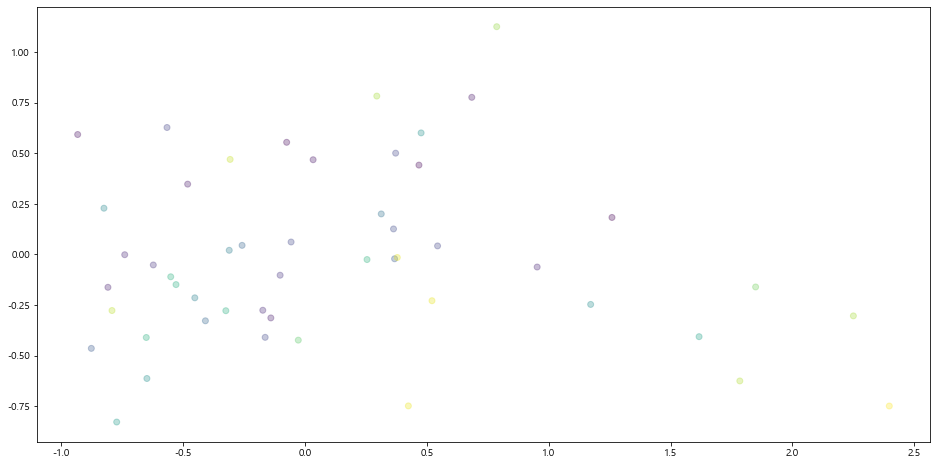

In [129]:
plt.figure(figsize=(16, 8))
plt.scatter(result[valid_index, 0], result[valid_index, 1] , c = valid_labels , alpha=0.3)
# 차원을 축소 했기 때문 0, 1 
# sns.scatterplot(data= result[valid_index], x= result[valid_index, 0], y=result[valid_index, 1], 
#                 hue= valid_labels, alpha = 0.3)

for i, word in zip_index:
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))  #annotate () : 실제 word 값 
    
plt.show()